# San Francisco Bike Share Analysis


The purpose of this report is to identify opportunities for bikeshare business growth and provide practical recommendations to the management backed by 2013-2016 bikeshare data.

Areas of focus include:
- Maximizing return on fixed assets (stations and bikes)
- Growing recurring revenue to improve predictability, user coverage and maintenance needs 
- Understanding current and potential users to increase retention and acquire new customers

In the following sections, I will present my findings and share recommendations on ways to expand, grow recurring revenue and improve rider experience. 

1.  Commuter Bike Trips   

    A.  Top 5 Station Pairs Analysis and Recommendations  
    
    B.  City Map Analysis and Recommendations
    

2.  Weekend Trips 
    
    A.  Time of Day Analysis and Recommendations
    
    B.  Duration Analysis and Recommendations
    

3. Appendix : Data Cleanup and Exploration Observations and Code
   

### Section 1: Commuter Bike Trips 
#### A. Top 5 Station Pairs Analysis and Recommendations 

A commuter trip is defined as a trip not exceeding one hour and occuring on a weekday. This is typical in the US and supported by the bikeshare data where 96% of trips on weekdays do not exceed an hour. See Table 1.

##### Table 1 : Percentage of Weekday and Weekend Trips not exceeding an hour


In [619]:
import pandas as pd
import math

! bq query --use_legacy_sql=FALSE --max_rows=1000000 --format=csv 'SELECT * FROM `spring2021w205.project1w205.FINALPROJ1_0212`' > all_fields.csv
all_fields = pd.read_csv('all_fields.csv')
commuter_trip_duration=all_fields.groupby('start_weekday_end').avgmins.apply(lambda x: len(x[x<60])/len(x) )
commuter_trip_duration=commuter_trip_duration.to_frame()
commuter_trip_duration.avgmins = (commuter_trip_duration.avgmins * 100).astype(str) + '%'
commuter_trip_duration.index.rename('Weekday or Weekend', inplace=True)
commuter_trip_duration.rename(columns = {'avgmins':'Percentage of trips less than 1hour'}, inplace = True)
commuter_trip_duration


Waiting on bqjob_r24895a4988b15f9a_000001779f5a97fd_1 ... (0s) Current status: DONE   


Percentage of trips less than 1hour
Weekday or Weekend                                    
Weekday                             96.26967626967627%
Weekend                             91.24983146824862%

We analyze the Top 5 Commuter Stations Pairs to identify areas which require more attention to bike servicing and where we may have potential to grow the recurring revenue base with significant results.

##### Table 2 : Top 5 Commuter Station Pairs on Weekdays

In [620]:
import pandas as pd
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `spring2021w205.project1w205.part2_1a`'> top_5_commuter_trips.csv
top_5_commuter_trips=pd.read_csv('top_5_commuter_trips.csv')
top_5_commuter_trips.sum_trips = (top_5_commuter_trips.sum_trips).astype(int) 
top_5_commuter_trips['sum_trips'] = top_5_commuter_trips['sum_trips']. map('{:,.2f}'. format)
top_5_commuter_trips

Waiting on bqjob_r78c08e15a8f4afb8_000001779f5b7436_1 ... (0s) Current status: DONE   


start_station_id                       start_station_name  end_station_id  \
0                69  San Francisco Caltrain 2 (330 Townsend)              65   
1                61                          2nd at Townsend              50   
2                50     Harry Bridges Plaza (Ferry Building)              60   
3                65                          Townsend at 7th              69   
4                60                   Embarcadero at Sansome              74   

                          end_station_name sum_trips  
0                          Townsend at 7th  8,044.00  
1     Harry Bridges Plaza (Ferry Building)  7,040.00  
2                   Embarcadero at Sansome  6,835.00  
3  San Francisco Caltrain 2 (330 Townsend)  6,456.00  
4                        Steuart at Market  6,391.00

Table 3 shows us that a Key Utilization Performance Indicator - Rides Per Dock is the highest around those stations on weekdays as well.

##### Table 3 : Top 5 "Rides Per Dock" Bike Stations

In [621]:
import pandas as pd
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `spring2021w205.project1w205.part2_2a`'> top_5_rides_per_dock.csv
top_5_rides_per_dock=pd.read_csv('top_5_rides_per_dock.csv')
top_5_rides_per_dock

Waiting on bqjob_r7245388fc48a369_000001779f5b7b33_1 ... (0s) Current status: DONE   


start_station_id                        start_station_name  sum_trips  \
0                70  San Francisco Caltrain (Townsend at 4th)      16258   
1                69   San Francisco Caltrain 2 (330 Townsend)      15314   
2                60                    Embarcadero at Sansome       9118   
3                65                           Townsend at 7th       7166   
4                50      Harry Bridges Plaza (Ferry Building)      10983   

   avg_dockcount  rides_per_dock  
0           19.0           856.0  
1           23.0           666.0  
2           15.0           608.0  
3           15.0           478.0  
4           23.0           478.0

**Recommendation** : Bikes within a 10 minute radius of these stations will most likely be subject to high levels of wear-and-tear. Scheduling regular bike maintenance here during non-peak hours and replenishment with serviced bikes will be key to preserving high quality and safety of rider experience. Based on an analysis of bike demand fluctuations during different times of the day, the non-peak period during weekdays are identified as Nightime (11pm-5am) and Evening (8pm - 10pm) and Mid Day (11am - 1pm). See Chart 1.


Waiting on bqjob_r2866056002d5c200_000001779f5b81a6_1 ... (0s) Current status: DONE   


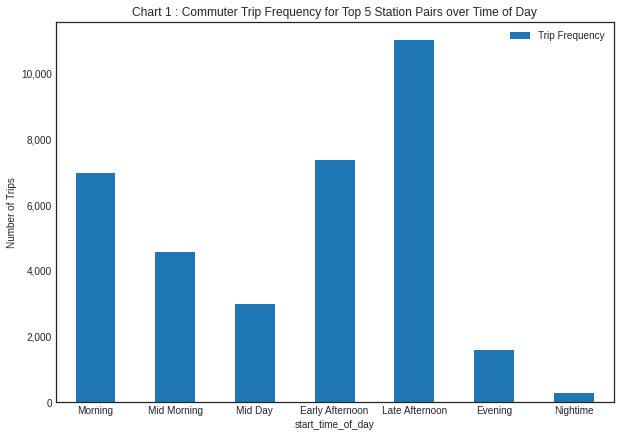

In [622]:
import pandas as pd
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `spring2021w205.project1w205.part2_1d`'> timing_customertype_top_commuter_trips.csv
timing_customertype_top_commuter_trips=pd.read_csv('timing_customertype_top_commuter_trips.csv')

import numpy as np
t1=timing_customertype_top_commuter_trips.groupby('start_time_of_day').agg({'sum_trips': 'sum'}) 
t1=t1.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])
t1.reset_index(inplace = True) 
#t1['Percentage']=t1['sum_trips']/34766
import matplotlib as mpl
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ax = t1.plot.bar(x='start_time_of_day', y='sum_trips', rot=0, figsize=(10,7),label='Trip Frequency', title='Chart 1 : Commuter Trip Frequency for Top 5 Station Pairs over Time of Day',ylabel='Number of Trips')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))


Bike riders choose between annual passes and one-time adhoc rides price plans. Chart 2 shows that non-recurring user base on those popular routes is 8% of total trip frequency at those top 5 station pairs. Since these are popular routes, an opportunity exists to capture these one-time users as part of our recurring model with a pricing plan that suits their commitment preferences.

**Recommendation** : To expand the proportion of recurring subscribers, consider offering a pilot weekly pass program for people using stations in this area to entice these one-time users (Customer) to join the program since the high volume should make up for the discount. If the program shows sucess, consider rolling out to other selective districts. 

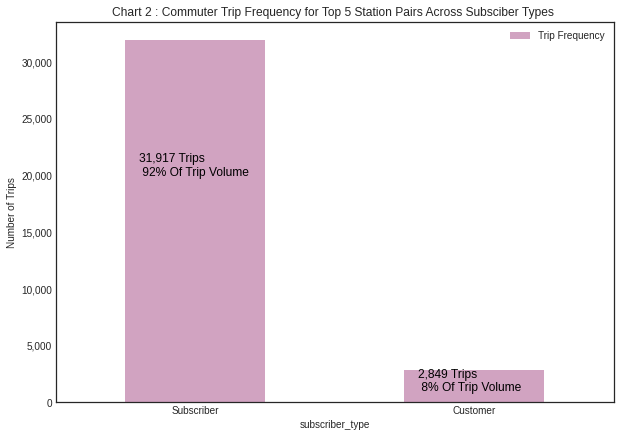

In [623]:
import numpy as np
s1=timing_customertype_top_commuter_trips.groupby('subscriber_type').agg({'sum_trips': 'sum'}) 
s1=s1.reindex(['Subscriber','Customer'])
s1.reset_index(inplace = True) 
import matplotlib as mpl
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ax = s1.plot.bar(x='subscriber_type', y='sum_trips', rot=0, figsize=(10,7),label='Trip Frequency', title='Chart 2 : Commuter Trip Frequency for Top 5 Station Pairs Across Subsciber Types ', color=(0.7, 0.4, 0.6, 0.6), ylabel='Number of Trips')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
style = dict(size=12, color='black')
ax.text(-0.2, 20000, "31,917 Trips"+"\n"+" 92% Of Trip Volume", **style)
ax.text(0.8, 1000, "2,849 Trips"+"\n"+" 8% Of Trip Volume", **style)
plt.show()

#### B. City Map Analysis and Recommendations 

A map-based representation of bike stations, associated weekday trip frequency on weekdays and their location on the map and proximity to BART stations reveals the following observations. See Map 1 for view station trip frequency vs Bay Area bike trip average. See Map 2-6 for view of each station in the City vs the City's bike trip average.:

1. **San Francisco City** : See Map 4. The city has the most bike stations and above average Bay area bike ridership demand on weekdays. Compared to the other four cities in Bay area,
San Francisco has the highest poverty level, second lowest median income, highest population density and a well-developed network of bike lanes. These associated factors have contributed to the surge in commuter bike demand and traffic.  

  **Recommendation** : The company will be best-placed to capture rising commuter demand by placing bike stations strategically. Bike stations should not be located too close to routes served by a high number of BART stations. We can see this effect clearly in Map 4, where demand can be captured by moving or building new stations around east and south of Folsom Street where there is high bike demand but relatively little BART or bike station coverage.


2. **San Jose City** : See Map 3. This city has the second highest poverty rate and the lowest median income amongst the bikeshare cities. In Map 3, we observe that demand is highly skewed towards the Caltrain station in San Jose where a great deal of travel happens. Demand around office areas and East of San Jose has the potential to be higher.  

   **Recommendation** : The company should work on marketing and publicity campaigns here to boost their image and acceptance of biking with office workers, students and locals. They should work hand-in-hand with local authorities to make biking a safe and alternative means of transport that the locals can depend on.


3. **Redwood City** : See Map 2. It shows high bike demand at the CalTrain Station and Stanford University administrative facility.  

   **Recommendation** : More bike stations can be placed around the University buildings so the staff can utilize this and also along the route towards the CalTrain Station.


4. **Mountain View**: See Map 6 : Bike stations are sparsely distributed in this city with a well-off populace of office workers. Above average utilization is observed at the Caltrain ,Shopping Center and Cityhall. Demand for bikes has been declining in the past few years.  
   
   **Recommendation** : Given the high income and demographics of the population there, it may be more relevant to pursue transport programs with escooters rather than bikes as a more environmentally friendly alternative to cars.

5. **Palo Alto**: See Map 5. Above average utilization near the Cowper at University and Palo Alto Caltrain. This is probably from local workers who travel into the city to work.  

   **Recommendation** : More bike stations should be added Downtown and around Stanford University premises where no bike stations exist at the moment. Travel by bike would be an attractive mode of transport for University students and some locals. The station network needs to be expanded to improve viability of bike transport 
   as an option.

In [624]:
import pandas as pd
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `spring2021w205.project1w205.weekday_commuter_tripfreq`' > wdtf.csv
wdtf = pd.read_csv('wdtf.csv')


Waiting on bqjob_r226361511611b0f5_000001779f5b89a7_1 ... (0s) Current status: DONE   


In [625]:
!pip install descarteslabs
!pip install descartes
!pip install geopandas
!pip install contextily 

In [626]:
from matplotlib.colors import LinearSegmentedColormap
from collections import OrderedDict 

cdict1 = OrderedDict()
cdict1 = {
         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0)),
          'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.1),
                   (1.0, 1.0, 1.0)),
        }
gbr = LinearSegmentedColormap('gbr', cdict1)

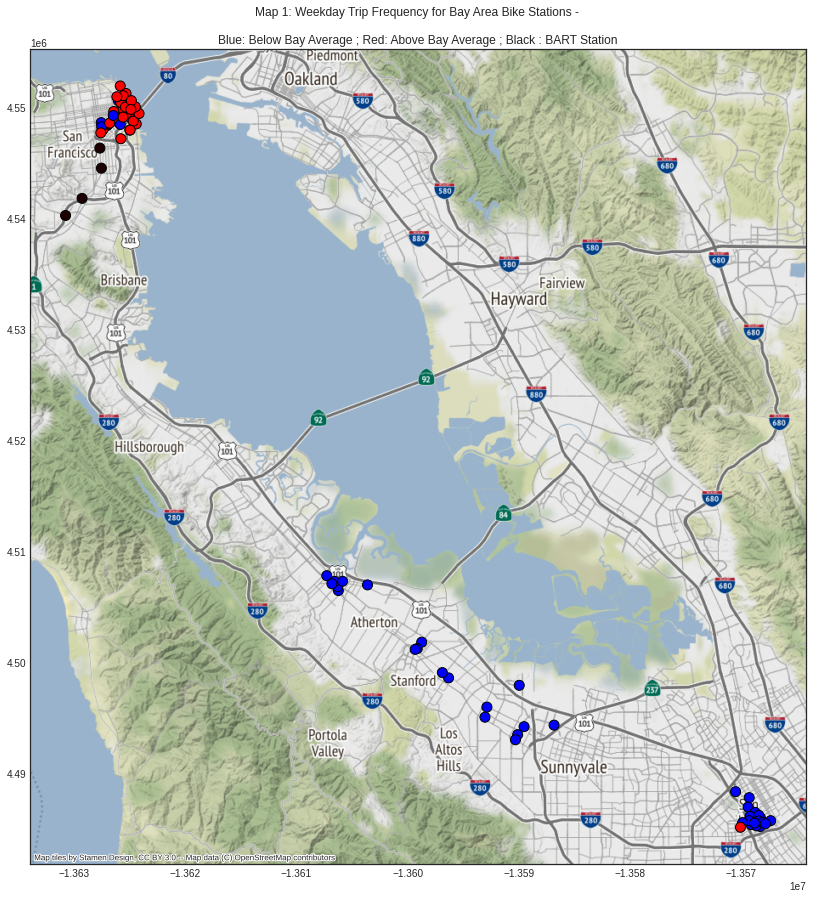

In [627]:
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx
import descarteslabs
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
bart_loc = 'bart2.csv'
bart = pd.read_csv(bart_loc)
bart_gdf = gpd.GeoDataFrame(bart, geometry=gpd.points_from_xy(bart['X'], bart['Y']), crs='EPSG:4269') 
wdtf['ab_average']=np.where(wdtf['trip_freq']>=11545,1,0)
wdtf_gdf=gpd.GeoDataFrame(wdtf, geometry=gpd.points_from_xy(wdtf['X'], wdtf['Y']), crs='EPSG:4269')
city_list=wdtf.start_city.unique() 
combined=pd.concat([bart_gdf, wdtf_gdf])
combined["ab_average"].fillna(0.5, inplace = True) 
counter=1
txt="Blue: Below Bay Average ; Red: Above Bay Average ; Black : BART Station"
ax = combined[combined.start_city.isin(city_list)].to_crs('EPSG:3857').plot(column='ab_average',edgecolor="black", figsize=(15,15),markersize=100,cmap=gbr)
plt.title("Map 1: Weekday Trip Frequency for Bay Area Bike Stations - "+"\n\n"+txt)
cx.add_basemap(ax)
#for i in city_list:
#    ax = combined[combined['start_city']==i].to_crs('EPSG:3857').plot(column='ab_average',edgecolor="black", markersize=100,cmap=gbr)
#    plt.title("Map "+str(counter)+": Weekday Trip Frequency - "+i+" vs Bay Area Average"+"\n\n"+txt+"\n")
#    cx.add_basemap(ax)
#    counter=counter+1


In [628]:
result = wdtf.groupby('start_city').agg({'trip_freq': ['mean', 'min', 'max']}) 
result

trip_freq             
                       mean   min    max
start_city                              
Mountain View   3054.000000  1034   8029
Palo Alto       1318.400000   726   2532
Redwood City     617.000000   158   1960
San Francisco  21035.027027    42  68457
San Jose        2429.944444     3  12660

In [629]:

! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `spring2021w205.project1w205.wdtf_cityaverage`' > wdtf2.csv

wdtf2 = pd.read_csv('wdtf2.csv')     


Waiting on bqjob_r4080012869dde6aa_000001779f5bc026_1 ... (0s) Current status: DONE   


In [630]:
wdtf2.to_csv(r'test.csv', index = False)

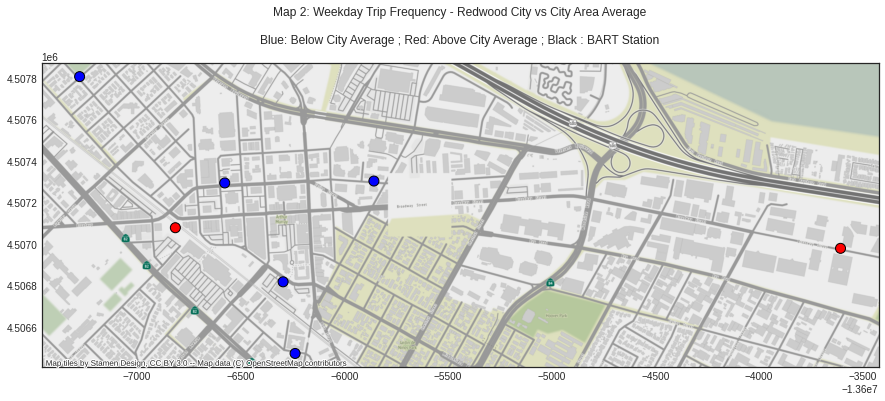

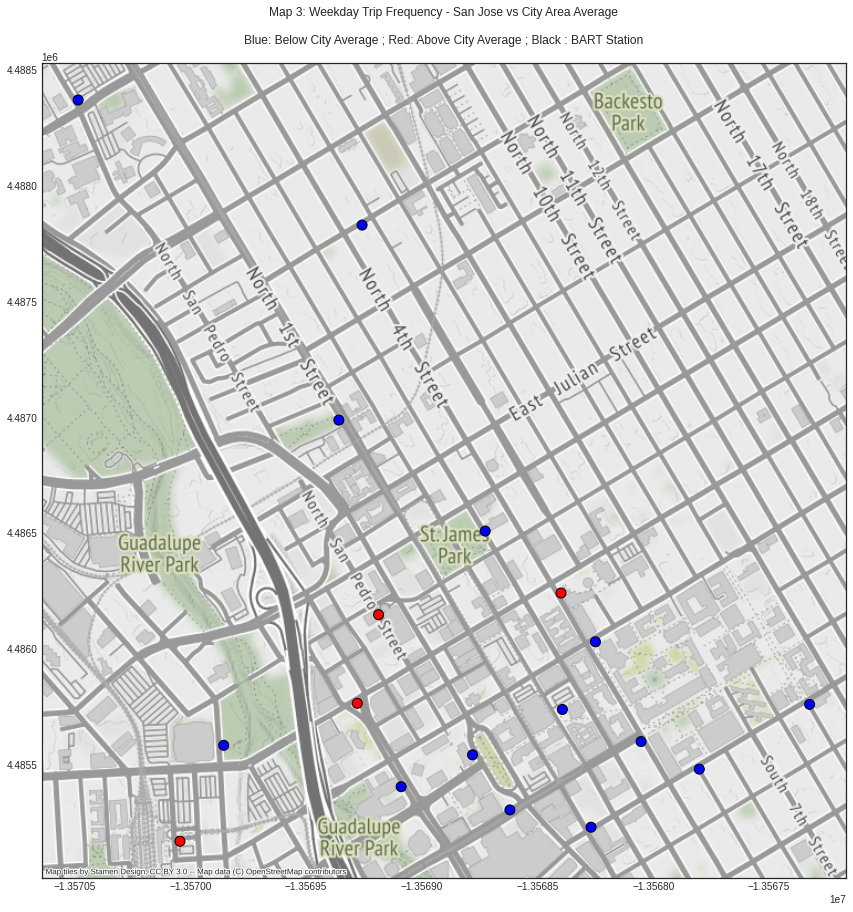

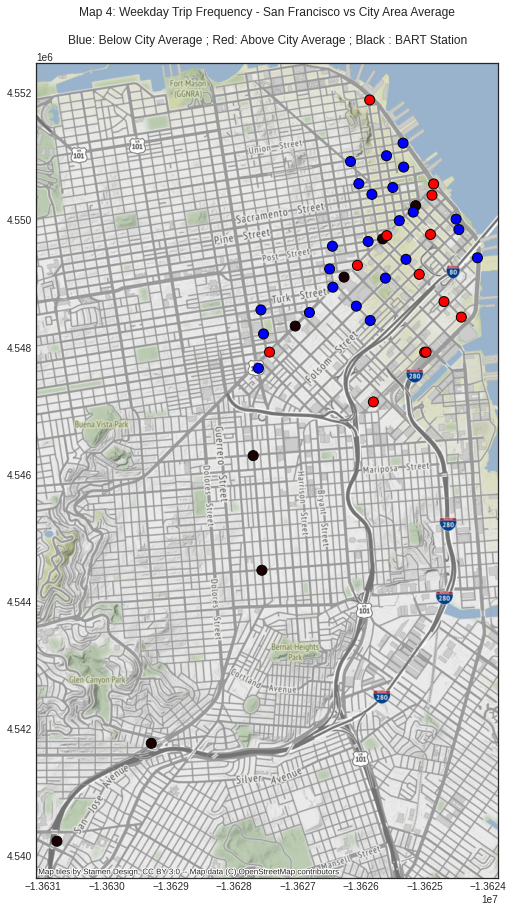

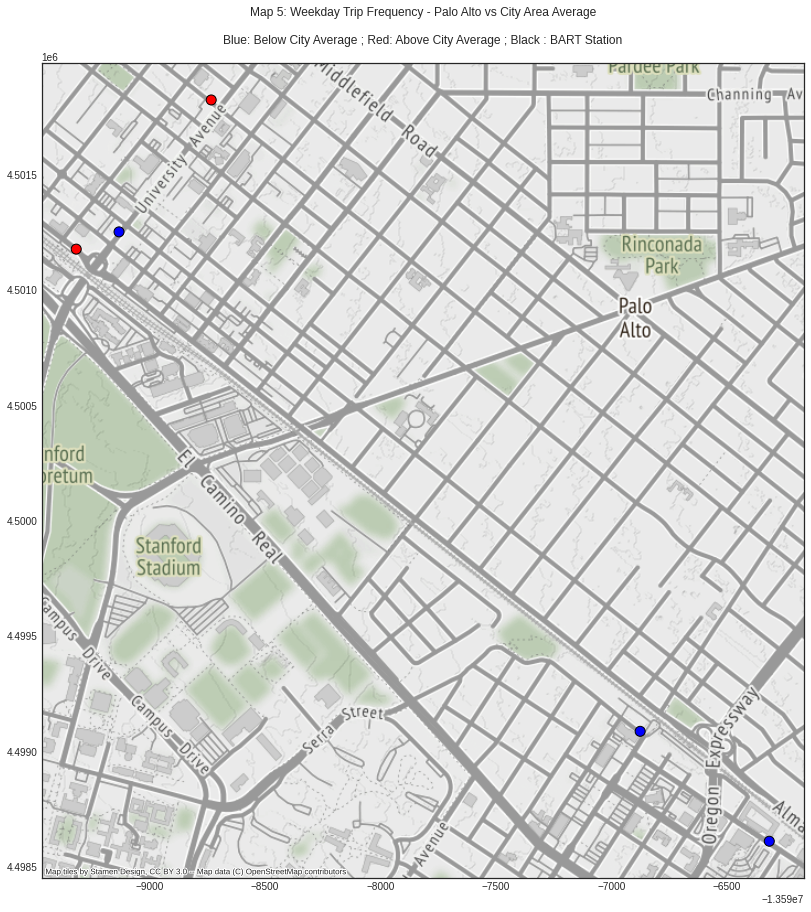

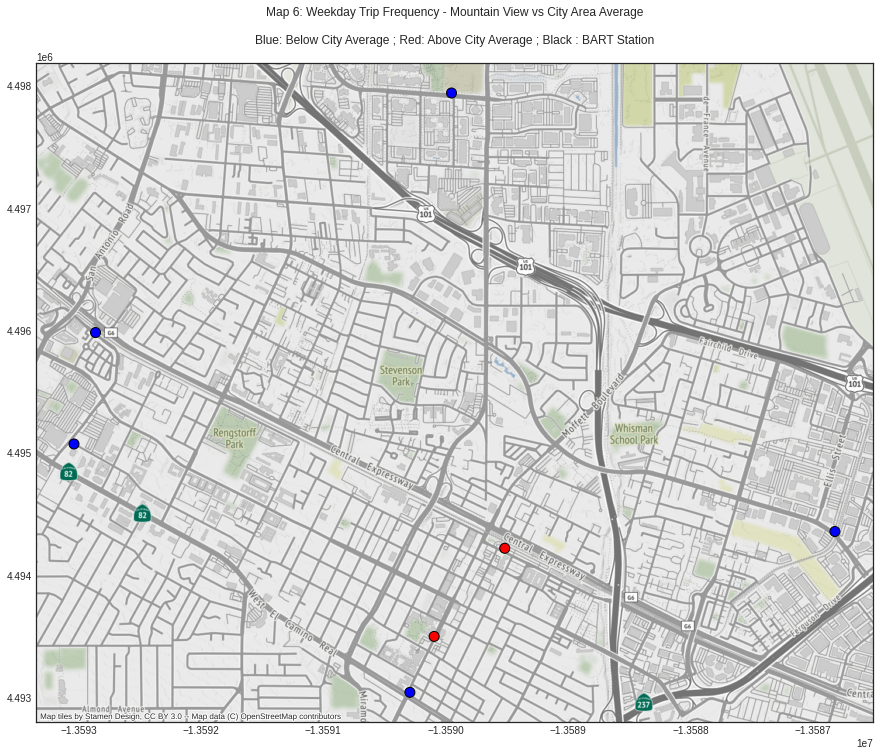

In [631]:

wdtf_gdf2=gpd.GeoDataFrame(wdtf2, geometry=gpd.points_from_xy(wdtf2['X'], wdtf2['Y']), crs='EPSG:4269')
city_list=wdtf2.start_city.unique() 
combined2=pd.concat([bart_gdf, wdtf_gdf2])
combined2["ab_city_average"].fillna(0.5, inplace = True) 
txt2="Blue: Below City Average ; Red: Above City Average ; Black : BART Station"
counter2=2
for i in city_list:
    ax = combined2[combined2['start_city']==i].to_crs('EPSG:3857').plot(column='ab_city_average',edgecolor="black", figsize=(15,15),markersize=100,cmap=gbr)
    plt.title("Map "+str(counter2)+": Weekday Trip Frequency - "+i+" vs City Area Average"+"\n\n"+txt2+"\n")
    cx.add_basemap(ax)
    counter2=counter2+1

### Section 2: Weekend Trips 
#### A. Time of Day Analysis and Recommendations

From the Trip Frequency Graphs in Chart 3-7, most City bikers tend to bike in the morning, early afternoon and late afternoon. One-time customers tend to bike mid day, early afternoon and late afternoon, presumably to go sightseeing or to have lunch.  

**Recommendation** : It will be beneficial to the company to seek partnerships with local restaurants and cafes where biking for a certain mileage while using the app's tracker would earn the rider loyalty points which they can then use to redeem for small discounts at participating restaurants if they create an account with the company. This will not only create loyalty with existing subscribers but also encourage one-time users to create an account. The creation of accounts by one-time users brings the company several benefits :   

   (i) Build new user loyalty by incentivising them to use the company for one-off bike-share needs  
   (ii) Create the opportunity for more user information to be collected   
   (iii) Increase the likelihood of more customers choosing to use a bike to get to a restaurant on a weekend compared to other modes of transportation  
   (iv) Increase the proportion of recurring business and revenue.


#### B. Duration Analysis and Recommendations

Trip Duration wise, the Subscibers tend to keep within the 45 minute limit while One-time users typically exceed the 30 min limit.

**Recommendation** : To improve the user experience and pricing perception towards our product held by One-time customers, it might be worthwhile to introduce a tourist day pass program to cover them for a longer duration of 2 hours.

In [632]:
import pandas as pd
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `spring2021w205.project1w205.weekend_allcust`'> weekend_allcust.csv
weekend_allcust=pd.read_csv('weekend_allcust.csv')
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `spring2021w205.project1w205.weekend_onetimecust`'> weekend_onetimecust.csv
weekend_onetimecust=pd.read_csv('weekend_onetimecust.csv')
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `spring2021w205.project1w205.weekend_subscriber`'> weekend_subscriber.csv
weekend_subscriber=pd.read_csv('weekend_subscriber.csv')

Waiting on bqjob_r5d1247264e359a48_000001779f5bdcf3_1 ... (0s) Current status: DONE   
Waiting on bqjob_r118fc8878acc28bb_000001779f5be306_1 ... (0s) Current status: DONE   
Waiting on bqjob_rf4ec45cff3d97a5_000001779f5be929_1 ... (0s) Current status: DONE   


In [633]:
rwc_wa = weekend_allcust[weekend_allcust['start_city']=="Redwood City"]
sj_wa = weekend_allcust[weekend_allcust['start_city']=="San Jose"]
sf_wa = weekend_allcust[weekend_allcust['start_city']=="San Francisco"]
mv_wa = weekend_allcust[weekend_allcust['start_city']=="Mountain View"]
pa_wa = weekend_allcust[weekend_allcust['start_city']=="Palo Alto"]
rwc_wo = weekend_onetimecust[weekend_onetimecust['start_city']=="Redwood City"]
sj_wo = weekend_onetimecust[weekend_onetimecust['start_city']=="San Jose"]
sf_wo = weekend_onetimecust[weekend_onetimecust['start_city']=="San Francisco"]
mv_wo = weekend_onetimecust[weekend_onetimecust['start_city']=="Mountain View"]
pa_wo = weekend_onetimecust[weekend_onetimecust['start_city']=="Palo Alto"]
rwc_ws = weekend_subscriber[weekend_subscriber['start_city']=="Redwood City"]
sj_ws = weekend_subscriber[weekend_subscriber['start_city']=="San Jose"]
sf_ws = weekend_subscriber[weekend_subscriber['start_city']=="San Francisco"]
mv_ws = weekend_subscriber[weekend_subscriber['start_city']=="Mountain View"]
pa_ws = weekend_subscriber[weekend_subscriber['start_city']=="Palo Alto"]


In [634]:
RWC_WA_T = rwc_wa[['start_time_of_day', 'sum_trips']].copy()
RWC_WA_T = RWC_WA_T.set_index('start_time_of_day')
RWC_WA_T = RWC_WA_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

RWC_WA_M = rwc_wa[['start_time_of_day', 'avgmins']].copy()
RWC_WA_M = RWC_WA_M.set_index('start_time_of_day')
RWC_WA_M = RWC_WA_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SJ_WA_T = sj_wa[['start_time_of_day', 'sum_trips']].copy()
SJ_WA_T = SJ_WA_T.set_index('start_time_of_day')
SJ_WA_T = SJ_WA_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SJ_WA_M = sj_wa[['start_time_of_day', 'avgmins']].copy()
SJ_WA_M = SJ_WA_M.set_index('start_time_of_day')
SJ_WA_M = SJ_WA_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SF_WA_T = sf_wa[['start_time_of_day', 'sum_trips']].copy()
SF_WA_T = SF_WA_T.set_index('start_time_of_day')
SF_WA_T = SF_WA_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SF_WA_M = sf_wa[['start_time_of_day', 'avgmins']].copy()
SF_WA_M = SF_WA_M.set_index('start_time_of_day')
SF_WA_M = SF_WA_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

MV_WA_T = mv_wa[['start_time_of_day', 'sum_trips']].copy()
MV_WA_T = MV_WA_T.set_index('start_time_of_day')
MV_WA_T = MV_WA_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

MV_WA_M = mv_wa[['start_time_of_day', 'avgmins']].copy()
MV_WA_M = MV_WA_M.set_index('start_time_of_day')
MV_WA_M = MV_WA_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

PA_WA_T = pa_wa[['start_time_of_day', 'sum_trips']].copy()
PA_WA_T = PA_WA_T.set_index('start_time_of_day')
PA_WA_T = PA_WA_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

PA_WA_M = pa_wa[['start_time_of_day', 'avgmins']].copy()
PA_WA_M = PA_WA_M.set_index('start_time_of_day')
PA_WA_M = PA_WA_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])



In [636]:
RWC_WO_T = rwc_wo[['start_time_of_day', 'sum_trips']].copy()
RWC_WO_T = RWC_WO_T.set_index('start_time_of_day')
RWC_WO_T = RWC_WO_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

RWC_WO_M = rwc_wo[['start_time_of_day', 'avgmins']].copy()
RWC_WO_M = RWC_WO_M.set_index('start_time_of_day')
RWC_WO_M = RWC_WO_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SJ_WO_T = sj_wo[['start_time_of_day', 'sum_trips']].copy()
SJ_WO_T = SJ_WO_T.set_index('start_time_of_day')
SJ_WO_T = SJ_WO_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SJ_WO_M = sj_wo[['start_time_of_day', 'avgmins']].copy()
SJ_WO_M = SJ_WO_M.set_index('start_time_of_day')
SJ_WO_M = SJ_WO_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SF_WO_T = sf_wo[['start_time_of_day', 'sum_trips']].copy()
SF_WO_T = SF_WO_T.set_index('start_time_of_day')
SF_WO_T = SF_WO_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SF_WO_M = sf_wo[['start_time_of_day', 'avgmins']].copy()
SF_WO_M = SF_WO_M.set_index('start_time_of_day')
SF_WO_M = SF_WO_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

MV_WO_T = mv_wo[['start_time_of_day', 'sum_trips']].copy()
MV_WO_T = MV_WO_T.set_index('start_time_of_day')
MV_WO_T = MV_WO_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

MV_WO_M = mv_wo[['start_time_of_day', 'avgmins']].copy()
MV_WO_M = MV_WO_M.set_index('start_time_of_day')
MV_WO_M = MV_WO_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

PA_WO_T = pa_wo[['start_time_of_day', 'sum_trips']].copy()
PA_WO_T = PA_WO_T.set_index('start_time_of_day')
PA_WO_T = PA_WO_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

PA_WO_M = pa_wo[['start_time_of_day', 'avgmins']].copy()
PA_WO_M = PA_WO_M.set_index('start_time_of_day')
PA_WO_M = PA_WO_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])



In [637]:
RWC_WS_T = rwc_ws[['start_time_of_day', 'sum_trips']].copy()
RWC_WS_T = RWC_WS_T.set_index('start_time_of_day')
RWC_WS_T = RWC_WS_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

RWC_WS_M = rwc_ws[['start_time_of_day', 'avgmins']].copy()
RWC_WS_M = RWC_WS_M.set_index('start_time_of_day')
RWC_WS_M = RWC_WS_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SJ_WS_T = sj_ws[['start_time_of_day', 'sum_trips']].copy()
SJ_WS_T = SJ_WS_T.set_index('start_time_of_day')
SJ_WS_T = SJ_WS_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SJ_WS_M = sj_ws[['start_time_of_day', 'avgmins']].copy()
SJ_WS_M = SJ_WS_M.set_index('start_time_of_day')
SJ_WS_M = SJ_WS_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SF_WS_T = sf_ws[['start_time_of_day', 'sum_trips']].copy()
SF_WS_T = SF_WS_T.set_index('start_time_of_day')
SF_WS_T = SF_WS_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

SF_WS_M = sf_ws[['start_time_of_day', 'avgmins']].copy()
SF_WS_M = SF_WS_M.set_index('start_time_of_day')
SF_WS_M = SF_WS_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

MV_WS_T = mv_ws[['start_time_of_day', 'sum_trips']].copy()
MV_WS_T = MV_WS_T.set_index('start_time_of_day')
MV_WS_T = MV_WS_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

MV_WS_M = mv_ws[['start_time_of_day', 'avgmins']].copy()
MV_WS_M = MV_WS_M.set_index('start_time_of_day')
MV_WS_M = MV_WS_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

PA_WS_T = pa_ws[['start_time_of_day', 'sum_trips']].copy()
PA_WS_T = PA_WS_T.set_index('start_time_of_day')
PA_WS_T = PA_WS_T.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])

PA_WS_M = pa_ws[['start_time_of_day', 'avgmins']].copy()
PA_WS_M = PA_WS_M.set_index('start_time_of_day')
PA_WS_M = PA_WS_M.reindex(['Morning','Mid Morning','Mid Day','Early Afternoon', 'Late Afternoon', 'Evening','Nightime'])



Chart 3: Redwood City Weekend Trip Analytics


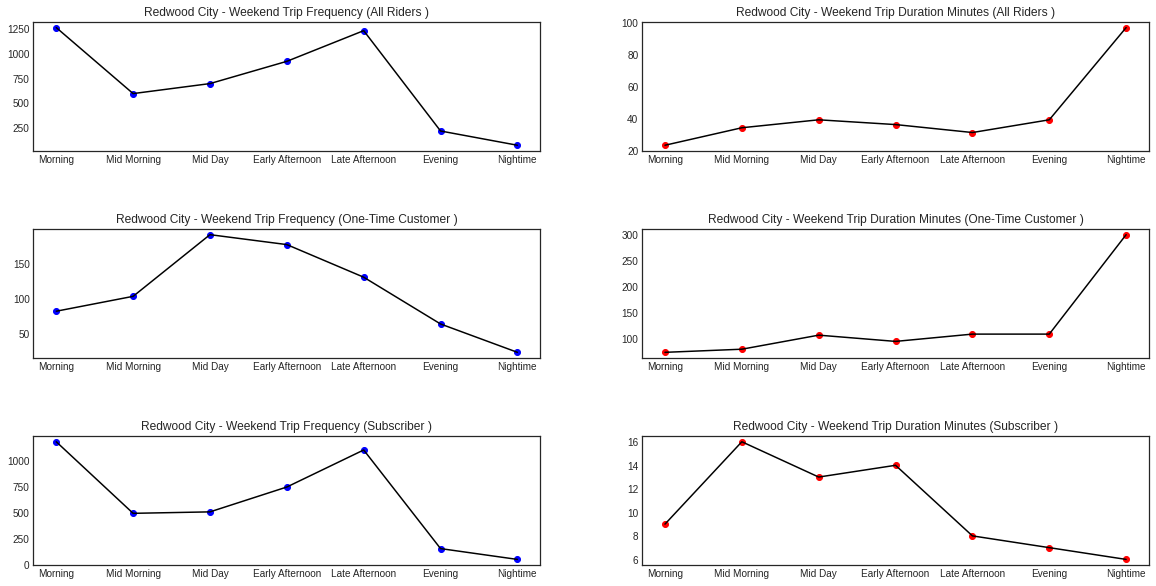

In [638]:
import matplotlib as mpl
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print("Chart 3: Redwood City Weekend Trip Analytics")
fig, ax = plt.subplots(6, figsize=(20, 10))
fig.subplots_adjust(hspace=0.6)
plt.subplot(321, title="Redwood City - Weekend Trip Frequency (All Riders )" )
plt.plot(RWC_WA_T.index, RWC_WA_T.sum_trips, 'bo' , RWC_WA_T.index, RWC_WA_T.sum_trips, 'k')
plt.subplot(322, title="Redwood City - Weekend Trip Duration Minutes (All Riders )")
plt.plot(RWC_WA_M.index, RWC_WA_M.avgmins, 'ro' , RWC_WA_M.index, RWC_WA_M.avgmins, 'k' )
plt.subplot(323, title="Redwood City - Weekend Trip Frequency (One-Time Customer )" )
plt.plot(RWC_WO_T.index, RWC_WO_T.sum_trips, 'bo' ,RWC_WO_T.index, RWC_WO_T.sum_trips, 'k', )
plt.subplot(324, title="Redwood City - Weekend Trip Duration Minutes (One-Time Customer )")
plt.plot(RWC_WO_M.index, RWC_WO_M.avgmins, 'ro' , RWC_WO_M.index, RWC_WO_M.avgmins, 'k' )
plt.subplot(325, title="Redwood City - Weekend Trip Frequency (Subscriber )" )
plt.plot(RWC_WS_T.index, RWC_WS_T.sum_trips, 'bo' ,RWC_WS_T.index, RWC_WS_T.sum_trips, 'k', )
plt.subplot(326, title="Redwood City - Weekend Trip Duration Minutes (Subscriber )")
plt.plot(RWC_WS_M.index, RWC_WS_M.avgmins, 'ro' , RWC_WS_M.index, RWC_WS_M.avgmins, 'k' )
plt.show()



Chart 4: San Jose City Weekend Trip Analytics


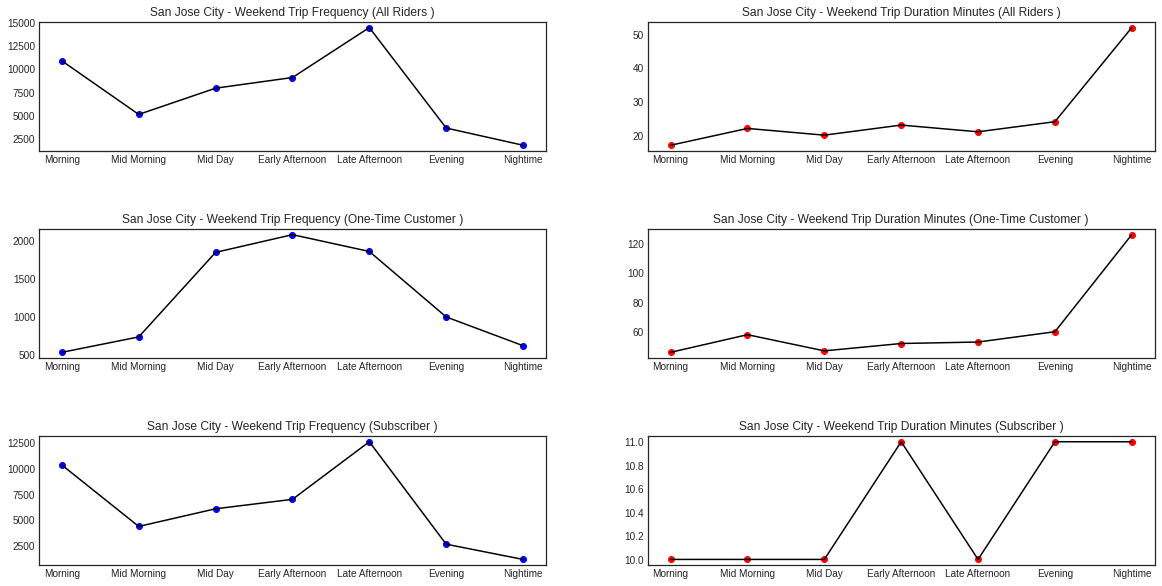

In [639]:
import matplotlib as mpl
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print("Chart 4: San Jose City Weekend Trip Analytics")
fig, ax = plt.subplots(6, figsize=(20, 10))
fig.subplots_adjust(hspace=0.6)
plt.subplot(321, title="San Jose City - Weekend Trip Frequency (All Riders )" )
plt.plot(SJ_WA_T.index, SJ_WA_T.sum_trips, 'bo' , SJ_WA_T.index, SJ_WA_T.sum_trips, 'k')
plt.subplot(322, title="San Jose City - Weekend Trip Duration Minutes (All Riders )")
plt.plot(SJ_WA_M.index, SJ_WA_M.avgmins, 'ro' , SJ_WA_M.index, SJ_WA_M.avgmins, 'k' )
plt.subplot(323, title="San Jose City - Weekend Trip Frequency (One-Time Customer )" )
plt.plot(SJ_WO_T.index, SJ_WO_T.sum_trips, 'bo' ,SJ_WO_T.index, SJ_WO_T.sum_trips, 'k', )
plt.subplot(324, title="San Jose City - Weekend Trip Duration Minutes (One-Time Customer )")
plt.plot(SJ_WO_M.index, SJ_WO_M.avgmins, 'ro' , SJ_WO_M.index, SJ_WO_M.avgmins, 'k' )
plt.subplot(325, title="San Jose City - Weekend Trip Frequency (Subscriber )" )
plt.plot(SJ_WS_T.index, SJ_WS_T.sum_trips, 'bo' ,SJ_WS_T.index, SJ_WS_T.sum_trips, 'k', )
plt.subplot(326, title="San Jose City - Weekend Trip Duration Minutes (Subscriber )")
plt.plot(SJ_WS_M.index, SJ_WS_M.avgmins, 'ro' , SJ_WS_M.index, SJ_WS_M.avgmins, 'k' )
plt.show()



Chart 5: San Francisco City Weekend Trip Analytics


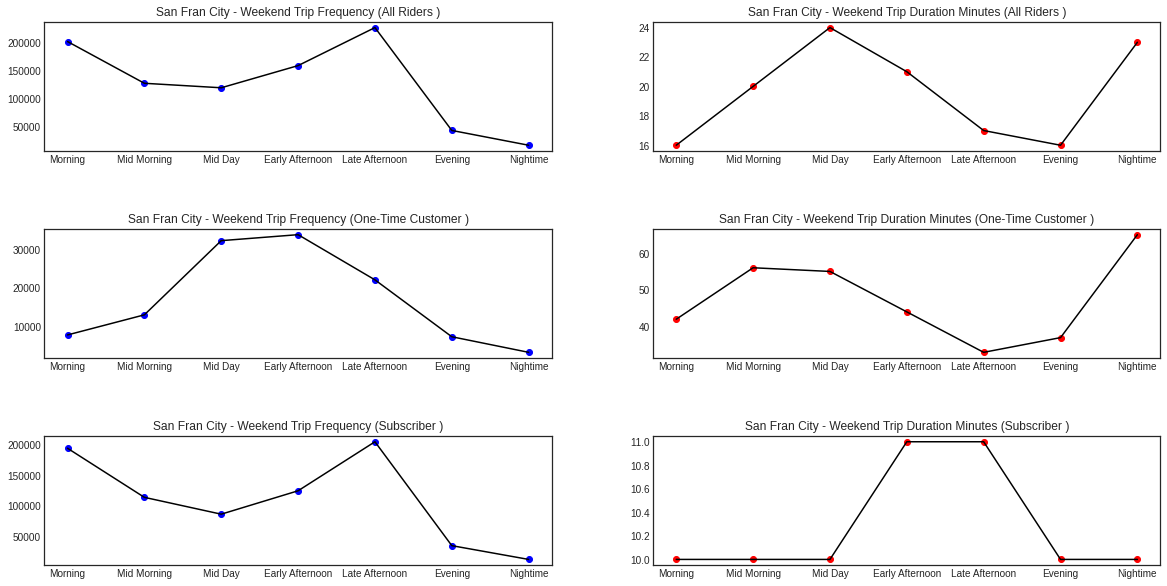

In [640]:
import matplotlib as mpl
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print("Chart 5: San Francisco City Weekend Trip Analytics")
fig, ax = plt.subplots(6, figsize=(20, 10))
fig.subplots_adjust(hspace=0.6)
plt.subplot(321, title="San Fran City - Weekend Trip Frequency (All Riders )" )
plt.plot(SF_WA_T.index, SF_WA_T.sum_trips, 'bo' , SF_WA_T.index, SF_WA_T.sum_trips, 'k')
plt.subplot(322, title="San Fran City - Weekend Trip Duration Minutes (All Riders )")
plt.plot(SF_WA_M.index, SF_WA_M.avgmins, 'ro' , SF_WA_M.index, SF_WA_M.avgmins, 'k' )
plt.subplot(323, title="San Fran City - Weekend Trip Frequency (One-Time Customer )" )
plt.plot(SF_WO_T.index, SF_WO_T.sum_trips, 'bo' ,SF_WO_T.index, SF_WO_T.sum_trips, 'k', )
plt.subplot(324, title="San Fran City - Weekend Trip Duration Minutes (One-Time Customer )")
plt.plot(SF_WO_M.index, SF_WO_M.avgmins, 'ro' , SF_WO_M.index, SF_WO_M.avgmins, 'k' )
plt.subplot(325, title="San Fran City - Weekend Trip Frequency (Subscriber )" )
plt.plot(SF_WS_T.index, SF_WS_T.sum_trips, 'bo' ,SF_WS_T.index, SF_WS_T.sum_trips, 'k', )
plt.subplot(326, title="San Fran City - Weekend Trip Duration Minutes (Subscriber )")
plt.plot(SF_WS_M.index, SF_WS_M.avgmins, 'ro' , SF_WS_M.index, SF_WS_M.avgmins, 'k' )
plt.show()



Chart 6: Mountain View City Weekend Trip Analytics


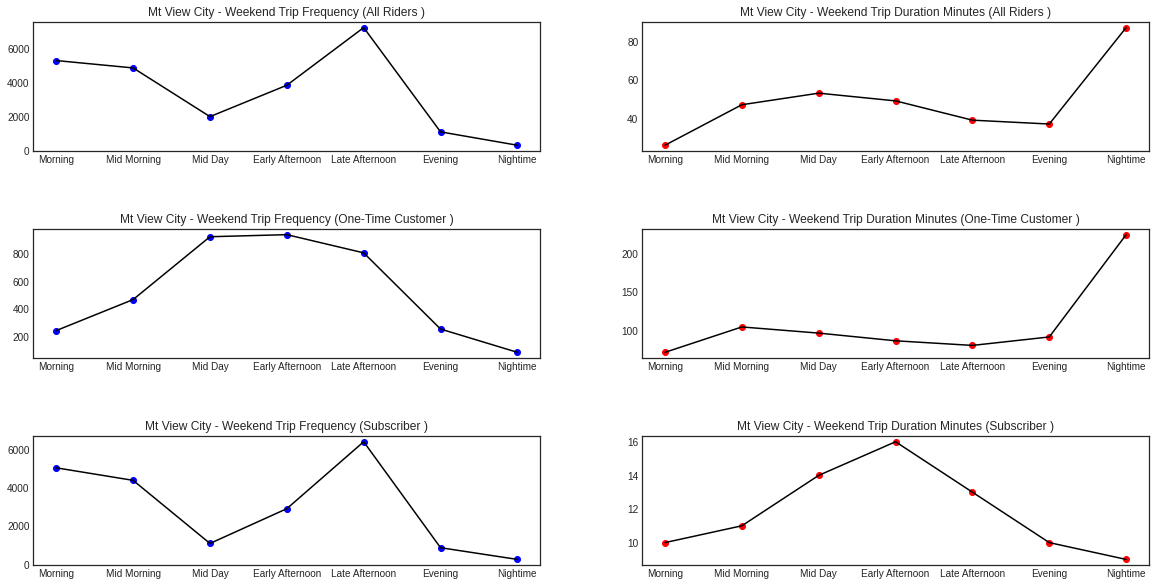

In [641]:
import matplotlib as mpl
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print("Chart 6: Mountain View City Weekend Trip Analytics")
fig, ax = plt.subplots(6, figsize=(20, 10))
fig.subplots_adjust(hspace=0.6)
plt.subplot(321, title="Mt View City - Weekend Trip Frequency (All Riders )" )
plt.plot(MV_WA_T.index, MV_WA_T.sum_trips, 'bo' , MV_WA_T.index, MV_WA_T.sum_trips, 'k')
plt.subplot(322, title="Mt View City - Weekend Trip Duration Minutes (All Riders )")
plt.plot(MV_WA_M.index, MV_WA_M.avgmins, 'ro' , MV_WA_M.index, MV_WA_M.avgmins, 'k' )
plt.subplot(323, title="Mt View City - Weekend Trip Frequency (One-Time Customer )" )
plt.plot(MV_WO_T.index, MV_WO_T.sum_trips, 'bo' ,MV_WO_T.index, MV_WO_T.sum_trips, 'k', )
plt.subplot(324, title="Mt View City - Weekend Trip Duration Minutes (One-Time Customer )")
plt.plot(MV_WO_M.index, MV_WO_M.avgmins, 'ro' , MV_WO_M.index, MV_WO_M.avgmins, 'k' )
plt.subplot(325, title="Mt View City - Weekend Trip Frequency (Subscriber )" )
plt.plot(MV_WS_T.index, MV_WS_T.sum_trips, 'bo' ,MV_WS_T.index, MV_WS_T.sum_trips, 'k', )
plt.subplot(326, title="Mt View City - Weekend Trip Duration Minutes (Subscriber )")
plt.plot(MV_WS_M.index, MV_WS_M.avgmins, 'ro' , MV_WS_M.index, MV_WS_M.avgmins, 'k' )
plt.show()



Chart 7: Palo Alto City Weekend Trip Analytics


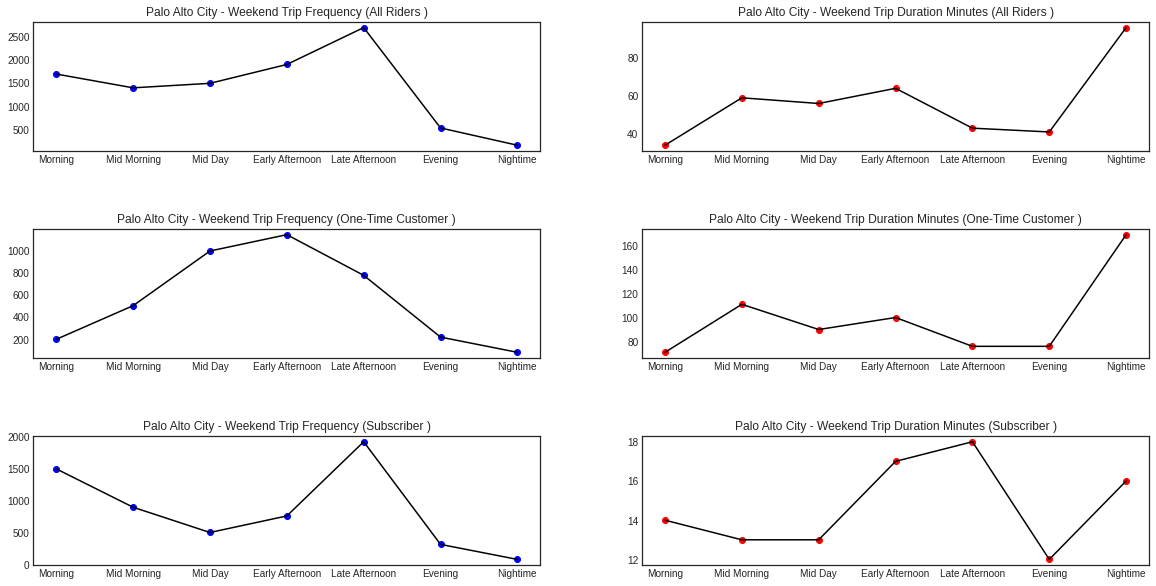

In [642]:
import matplotlib as mpl
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print("Chart 7: Palo Alto City Weekend Trip Analytics")
fig, ax = plt.subplots(6, figsize=(20, 10))
fig.subplots_adjust(hspace=0.6)
plt.subplot(321, title="Palo Alto City - Weekend Trip Frequency (All Riders )" )
plt.plot(PA_WA_T.index, PA_WA_T.sum_trips, 'bo' , PA_WA_T.index, PA_WA_T.sum_trips, 'k')
plt.subplot(322, title="Palo Alto City - Weekend Trip Duration Minutes (All Riders )")
plt.plot(PA_WA_M.index, PA_WA_M.avgmins, 'ro' , PA_WA_M.index, PA_WA_M.avgmins, 'k' )
plt.subplot(323, title="Palo Alto City - Weekend Trip Frequency (One-Time Customer )" )
plt.plot(PA_WO_T.index, PA_WO_T.sum_trips, 'bo' ,PA_WO_T.index, PA_WO_T.sum_trips, 'k', )
plt.subplot(324, title="Palo Alto City - Weekend Trip Duration Minutes (One-Time Customer )")
plt.plot(PA_WO_M.index, PA_WO_M.avgmins, 'ro' , PA_WO_M.index, PA_WO_M.avgmins, 'k' )
plt.subplot(325, title="Palo Alto City - Weekend Trip Frequency (Subscriber )" )
plt.plot(PA_WS_T.index, PA_WS_T.sum_trips, 'bo' ,PA_WS_T.index, PA_WS_T.sum_trips, 'k', )
plt.subplot(326, title="Palo Alto City - Weekend Trip Duration Minutes (Subscriber )")
plt.plot(PA_WS_M.index, PA_WS_M.avgmins, 'ro' , PA_WS_M.index, PA_WS_M.avgmins, 'k' )
plt.show()



## Appendix : Data Cleanup and Exploration Observations and Code

In the following section, I will list the code and the observation from Data Wrangling and Exploration activities.

1. Rides above 24 hours are unusual and rare, exclude from analysis.

```
bq query --use_legacy_sql=false 'SELECT duration_sec FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec>86400'
```



2. Rides less than or equal to a minute are unusual and rare, exclude from analysis.

```
bq query --use_legacy_sql=false 'SELECT duration_sec FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec<=60'
```



3.  442 instances of this found is bad data since we should not have docks available and bikes available both equal to zero.

```sql
SELECT *
FROM `bigquery-public-data.san_francisco.bikeshare_status`
WHERE docks_available=0 AND bikes_available=0
```



4. Trips data set has inconsistent station names for the same station ID. No similar issue with the station data set.

```sql
WITH startstation as(SELECT DISTINCT start_station_id, start_station_name
FROM `bigquery-public-data.san_francisco.bikeshare_trips`),
sstwo as(SELECT COUNT(start_station_id) as count_ids, start_station_id FROM startstation GROUP BY start_station_id)
SELECT count_ids,start_station_id FROM sstwo WHERE count_ids>1
```

```sql
WITH endstation as(SELECT DISTINCT end_station_id, end_station_name
FROM `bigquery-public-data.san_francisco.bikeshare_trips`),
estwo as(SELECT COUNT(end_station_id) as count_ids, end_station_id FROM endstation GROUP BY end_station_id)
SELECT count_ids,end_station_id FROM estwo WHERE count_ids>1
```

```sql
WITH station as(SELECT DISTINCT station_id, name
FROM `bigquery-public-data.san_francisco.bikeshare_stations`),
stationtwo as(SELECT COUNT(station_id) as count_ids, station_id FROM station GROUP BY station_id)
SELECT count_ids,station_id FROM stationtwo WHERE count_ids>1
```


5. Creating the sql master table ```spring2021w205.project1w205.FINALPROJ1_0212``` I have imported into this notebook. This is also the master table where all the smaller SQL tables are extracted from:
    
Step 1

```sql
WITH trip_table as (
SELECT start_station_name, start_station_id, trip_id,
end_station_name, end_station_id, duration_sec,bike_number, subscriber_type,
CAST(ROUND(duration_sec / 60.0) AS INT64) AS duration_minutes, 
CAST(ROUND(duration_sec / 3600.0) AS INT64) AS duration_hours_rounded,
ROUND(duration_sec / 3600.0, 1) AS duration_hours_tenths,
EXTRACT(YEAR FROM start_date) as start_year, 
EXTRACT(MONTH FROM start_date) as start_month,
EXTRACT(HOUR FROM start_date) as start_hour,
EXTRACT(MINUTE FROM start_date) as start_minute,
EXTRACT(DAYOFWEEK FROM start_date) AS start_dow_int,
CASE EXTRACT(DAYOFWEEK FROM start_date)
WHEN 1 THEN "Sunday"
WHEN 2 THEN "Monday"
WHEN 3 THEN "Tuesday"
WHEN 4 THEN "Wednesday"
WHEN 5 THEN "Thursday"
WHEN 6 THEN "Friday"
WHEN 7 THEN "Saturday"
END AS start_day_of_week,
CASE WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
ELSE "Weekday"
END AS start_weekday_end,
CASE WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Late Afternoon"
WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
END AS start_time_of_day
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE duration_sec >60 AND duration_sec<86400),

trip_tabletwo AS(
SELECT trip_table.start_station_name as wss, trip_table.start_station_id, trip_table.trip_id, trip_table.end_station_name as wes, 
trip_table.end_station_id, trip_table.duration_sec,trip_table.bike_number, trip_table.subscriber_type,
trip_table.duration_minutes, trip_table.duration_hours_rounded,trip_table.duration_hours_tenths,trip_table.start_year, 
trip_table.start_month, trip_table.start_hour, trip_table.start_minute, trip_table.start_dow_int, trip_table.start_day_of_week,
trip_table.start_weekday_end, trip_table.start_time_of_day,
station.name as start_station_name FROM trip_table LEFT JOIN 
`bigquery-public-data.san_francisco.bikeshare_stations` station 
ON trip_table.start_station_id=station.station_id),

trip_tablethree AS(
SELECT trip_tabletwo.start_station_name, trip_tabletwo.start_station_id, trip_tabletwo.trip_id,
trip_tabletwo.end_station_id, trip_tabletwo.duration_sec,trip_tabletwo.bike_number, trip_tabletwo.subscriber_type,
trip_tabletwo.duration_minutes, trip_tabletwo.duration_hours_rounded,trip_tabletwo.duration_hours_tenths,trip_tabletwo.start_year, 
trip_tabletwo.start_month, trip_tabletwo.start_hour, trip_tabletwo.start_minute, trip_tabletwo.start_dow_int, trip_tabletwo.start_day_of_week,
trip_tabletwo.start_weekday_end, trip_tabletwo.start_time_of_day,
station.name as end_station_name FROM trip_tabletwo LEFT JOIN 
`bigquery-public-data.san_francisco.bikeshare_stations` station 
ON trip_tabletwo.end_station_id=station.station_id)

SELECT start_station_name, start_station_id, 
end_station_name, end_station_id, bike_number, subscriber_type,
count(trip_id) as count_trip,
AVG(duration_hours_tenths) as avghours_dec, 
AVG(duration_hours_rounded) as avghours_round,
AVG(duration_minutes) as avgmins,
AVG(duration_sec) as avgsecs, start_year, start_month, start_weekday_end, start_time_of_day,
CONCAT(start_station_id,"-",start_year,"-",start_month,"-",start_weekday_end,"-",start_time_of_day) as concat_station_time 
FROM trip_tablethree 
GROUP BY start_station_id, start_station_name, end_station_id, end_station_name, bike_number, start_year, start_month, start_weekday_end, 
start_time_of_day, subscriber_type 
ORDER BY start_station_id asc, start_station_name, end_station_id asc, end_station_name, bike_number asc,
start_year desc, start_month asc, start_weekday_end asc, 
start_time_of_day asc, subscriber_type asc 
```

Step 2:
```sql
WITH dt_status as(SELECT station_id, bikes_available, docks_available,
EXTRACT(YEAR FROM time) as year, 
EXTRACT(MONTH FROM time) as month,
EXTRACT(DAY FROM time) as day_of_month,
EXTRACT(HOUR FROM time) as hour,
EXTRACT(DAYOFWEEK FROM time) AS dow_int,
CASE EXTRACT(DAYOFWEEK FROM time)
WHEN 1 THEN "Sunday"
WHEN 2 THEN "Monday"
WHEN 3 THEN "Tuesday"
WHEN 4 THEN "Wednesday"
WHEN 5 THEN "Thursday"
WHEN 6 THEN "Friday"
WHEN 7 THEN "Saturday"
END AS day_of_week,
CASE WHEN EXTRACT(DAYOFWEEK FROM time) IN (1, 7) THEN "Weekend"
ELSE "Weekday"
END AS weekday_end,
CASE WHEN EXTRACT(HOUR FROM time) <= 5  OR EXTRACT(HOUR FROM time) >= 23 THEN "Nightime"
WHEN EXTRACT(HOUR FROM time) >= 6 and EXTRACT(HOUR FROM time) <= 8 THEN "Morning"
WHEN EXTRACT(HOUR FROM time) >= 9 and EXTRACT(HOUR FROM time) <= 10 THEN "Mid Morning"
WHEN EXTRACT(HOUR FROM time) >= 11 and EXTRACT(HOUR FROM time) <= 13 THEN "Mid Day"
WHEN EXTRACT(HOUR FROM time) >= 14 and EXTRACT(HOUR FROM time) <= 16 THEN "Early Afternoon"
WHEN EXTRACT(HOUR FROM time) >= 17 and EXTRACT(HOUR FROM time) <= 19 THEN "Late Afternoon"
WHEN EXTRACT(HOUR FROM time) >= 20 and EXTRACT(HOUR FROM time) <= 22 THEN "Evening"
END AS time_of_day,
FROM `bigquery-public-data.san_francisco.bikeshare_status`
WHERE (docks_available+bikes_available)>0),
grouped_status as (
SELECT station_id, year, month, weekday_end,time_of_day, ROUND(AVG(bikes_available)) as avg_bikes_available, 
ROUND(AVG(docks_available)) as avg_docks_available, 
CONCAT(station_id,"-",year,"-",month,"-",weekday_end,"-",time_of_day) as concat_station_time 
FROM dt_status
GROUP BY station_id, year, month, weekday_end,time_of_day
ORDER BY station_id asc, year desc, month asc, weekday_end asc,time_of_day asc)
SELECT grouped_status.station_id, grouped_status.year, grouped_status.month, grouped_status.concat_station_time,
grouped_status.weekday_end,grouped_status.time_of_day, 
grouped_status.avg_bikes_available, 
grouped_status.avg_docks_available, station.dockcount FROM grouped_status 
LEFT JOIN `bigquery-public-data.san_francisco.bikeshare_stations` station 
ON grouped_status.station_id=station.station_id
WHERE station.dockcount IS NOT NULL
 ```
 
 Step 3:
 ```sql
 With tableone as (SELECT trip.start_station_name, trip.start_station_id,
trip.end_station_name, trip.end_station_id,
trip.start_year,
trip.start_month,
trip.start_weekday_end,
trip.start_time_of_day,
ROUND(AVG(trip.avghours_round)) as avghours_round,
ROUND(AVG(trip.avghours_dec),2) as avghours_dec,
ROUND(AVG(trip.avgmins)) as avgmins,
ROUND(AVG(trip.avgsecs)) as avgsecs,
SUM(trip.count_trip) as sum_trips,
trip.subscriber_type,
AVG(stationstatus.avg_bikes_available) as avg_bikes_available,
AVG(stationstatus.avg_docks_available) as avg_docks_available,
AVG(stationstatus.dockcount) as avg_dockcount,
FROM `spring2021w205.project1w205.trips0208_700` trip
LEFT JOIN `spring2021w205.project1w205.combinedstationstatus0208night`stationstatus
ON (stationstatus.concat_station_time = trip.concat_station_time)
GROUP BY trip.start_station_name, trip.start_station_id, 
trip.end_station_name, trip.end_station_id,
trip.start_year,trip.start_month,
trip.start_weekday_end,trip.start_time_of_day, subscriber_type),
tabletwo as(SELECT tableone.*, station.landmark as start_city, station.latitude as start_latitude, station.longitude as start_longitude FROM tableone
LEFT JOIN `bigquery-public-data.san_francisco.bikeshare_stations` station
ON tableone.start_station_id=station.station_id ),
tablethree as(SELECT * FROM tabletwo WHERE avg_bikes_available IS NOT NULL)
SELECT tablethree.*, station.landmark as end_city, station.latitude as end_latitude, station.longitude as end_longitude FROM tablethree 
LEFT JOIN `bigquery-public-data.san_francisco.bikeshare_stations` station
ON tablethree.end_station_id=station.station_id 
```




6. SQL for stations with  top 5 ride per dock metric in ```spring2021w205.project1w205.part2_2a ```

```sql
With twoa as(SELECT start_station_id, start_station_name,
SUM(sum_trips) as sum_trips, ROUND(AVG(avg_dockcount)) as avg_dockcount  
FROM `spring2021w205.project1w205.Final_Proj1_R`
WHERE start_year=2016
GROUP BY start_station_id, start_station_name),
twoatwo as(
SELECT start_station_id, start_station_name, sum_trips, avg_dockcount,ROUND(sum_trips/avg_dockcount) as rides_per_dock
FROM twoa)
SELECT start_station_id, start_station_name, sum_trips, avg_dockcount, rides_per_dock 
FROM twoatwo ORDER BY rides_per_dock desc LIMIT 5
```

7. SQL for top 5 station pairs in ```spring2021w205:project1w205.part2_1a ```

```sql
WITH Q1 as (SELECT start_station_id, start_station_name, 
end_station_id, end_station_name,
SUM(sum_trips) as sum_trips
FROM `spring2021w205.project1w205.Final_Proj1_R`
WHERE avghours_dec<=1 and start_weekday_end="Weekday"
GROUP BY start_station_name,start_station_id, end_station_name, end_station_id)

SELECT start_station_id, start_station_name, 
end_station_id, end_station_name,sum_trips FROM Q1
ORDER BY sum_trips desc LIMIT 5
```

8. SQL for customer type, timing of day analysis on top 5 station  pairs from ```spring2021w205:project1w205.part2_1d```

```sql
WITH Q1 as (SELECT start_station_id, start_station_name, 
end_station_id, end_station_name,
SUM(sum_trips) as sum_trips
FROM `spring2021w205.project1w205.Final_Proj1_R`
WHERE avghours_dec<=1 and start_weekday_end="Weekday"
GROUP BY start_station_name,start_station_id, end_station_name, end_station_id)
SELECT start_station_id, start_station_name, 
end_station_id, end_station_name,sum_trips FROM Q1
ORDER BY sum_trips desc LIMIT 5
```

*Note Final_Proj1_R SQL code is exactly the same as FINALPROJ1_0212, with the only difference for FINALPROJ1_0212 being that I added the coordinates (long,lat).

9. SQL code for `spring2021w205.project1w205.weekday_commuter_tripfreq` used for Bay Area Map Plot

sql```
SELECT start_longitude as X, start_latitude as Y, start_station_name, start_city, SUM(sum_trips) as trip_freq 
FROM `spring2021w205.project1w205.FINALPROJ1_0212`
WHERE avghours_dec<=1 and start_weekday_end="Weekday"
GROUP BY start_longitude, start_latitude, start_station_name, start_city
```

10. SQL code for City Maps from `spring2021w205.project1w205.wdtf_cityaverage`

```sql
SELECT *, 
CASE 
    WHEN trip_freq>=617 AND start_city="Redwood City" THEN 1
    WHEN  trip_freq>=2429 AND start_city="San Jose" THEN 1
    WHEN trip_freq>=21035 AND start_city="San Francisco" THEN 1
    WHEN trip_freq>=1318 AND start_city="Palo Alto" THEN 1
    WHEN trip_freq>=3054 AND start_city="Mountain View" THEN 1
    ELSE 0
END AS ab_city_average
FROM `spring2021w205.project1w205.weekday_commuter_tripfreq
```


11. SQL Code for Weekend All Customer Types Plots `spring2021w205.project1w205.weekend_allcust`

```sql
SELECT start_time_of_day, start_city, SUM(sum_trips) as sum_trips, ROUND(AVG(avgmins)) as avgmins 
FROM `spring2021w205.project1w205.FINALPROJ1_0212`
GROUP BY start_time_of_day, start_city
```

12. SQL Code for Weekend One-Time User Types Plots `spring2021w205.project1w205.weekend_onetimecust`

```sql
SELECT start_time_of_day, start_city, SUM(sum_trips) as sum_trips, ROUND(AVG(avgmins)) as avgmins 
FROM `spring2021w205.project1w205.FINALPROJ1_0212`
WHERE subscriber_type="Customer"
GROUP BY start_time_of_day, start_city
```

13. SQL Code for Weekend Subscriber Type Plots `spring2021w205.project1w205.weekend_subscriber`

```sql
SELECT start_time_of_day, start_city, SUM(sum_trips) as sum_trips, ROUND(AVG(avgmins)) as avgmins 
FROM `spring2021w205.project1w205.FINALPROJ1_0212`
WHERE subscriber_type="Subscriber"
GROUP BY start_time_of_day, start_city
```

14 . SQL Code for Proj1R used in Answering Project 1 Part 2 questions `spring2021w205.project1w205.Final_Proj1_R`

```sql
SELECT trip.start_station_name, trip.start_station_id,
trip.end_station_name, trip.end_station_id,
trip.start_year,
trip.start_month,
trip.start_weekday_end,
trip.start_time_of_day,
ROUND(AVG(trip.avghours_round)) as avghours_round,
ROUND(AVG(trip.avghours_dec),2) as avghours_dec,
ROUND(AVG(trip.avgmins)) as avgmins,
ROUND(AVG(trip.avgsecs)) as avgsecs,
SUM(trip.count_trip) as sum_trips,
trip.subscriber_type,
AVG(stationstatus.avg_bikes_available) as avg_bikes_available,
AVG(stationstatus.avg_docks_available) as avg_docks_available,
AVG(stationstatus.dockcount) as avg_dockcount,
FROM `spring2021w205.project1w205.trips0208_700` trip
LEFT JOIN `spring2021w205.project1w205.combinedstationstatus0208night`stationstatus
ON (stationstatus.concat_station_time = trip.concat_station_time)
GROUP BY trip.start_station_name, trip.start_station_id, 
trip.end_station_name, trip.end_station_id,
trip.start_year,trip.start_month,
trip.start_weekday_end,trip.start_time_of_day, subscriber_type
```


15 . SQL Code for Part2full used in Answering Project 1 Part 2 questions `spring2021w205.project1w205.part2_2_full`

```sql
With twoa as(SELECT start_station_id, start_station_name,
SUM(sum_trips) as sum_trips, ROUND(AVG(avg_dockcount)) as avg_dockcount, AVG(avg_bikes_available) as avg_bikes_available , 
AVG(avg_docks_available) as avg_docks_available 
FROM `spring2021w205.project1w205.Final_Proj1_R`
WHERE start_year=2016
GROUP BY start_station_id, start_station_name),
twoatwo as(
SELECT start_station_id, start_station_name, sum_trips, avg_dockcount,ROUND(sum_trips/avg_dockcount) as rides_per_dock, avg_bikes_available,
avg_docks_available
FROM twoa)
SELECT start_station_id, start_station_name, sum_trips, avg_dockcount, rides_per_dock ,ROUND(avg_bikes_available) as avg_bikes_available,
ROUND(avg_docks_available) as avg_docks_available
FROM twoatwo ORDER BY rides_per_dock asc 
```